In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

import networkx as nx
import ete3
import dendropy

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from PIL import Image

In [34]:
yearst = pd.read_csv("11172023_NG_yearST.csv")

In [35]:
yearst

,Sample,NG-MAST,Genogroup Group,Genogroup,NG-STAR,ST,Year
0,NG-1-2017,10451,A,10451,90,1901.0,2017
1,NG-10-2017,11933,B,11933,1061,1584.0,2017
2,NG-10-2018,3671,E,3671,1064,12462.0,2018
3,NG-100-2018,5985,C,5985,42,12462.0,2018
4,NG-101-2018,5985,C,5985,42,12462.0,2018
5,NG-102-2018,20814,B,11933,1061,1584.0,2018
6,NG-103-2018,10451,A,10451,90,1901.0,2018
7,NG-104-2018,18043,N,11299,90,11602.0,2018
8,NG-106-2018,5985,C,5985,42,12462.0,2018
9,NG-107-2018,10451,A,10451,90,1901.0,2018


In [36]:
yearst['Genogroup'] = 'GG' + yearst['Genogroup']

In [37]:
NGMAST_unique_values = yearst["NG-MAST"].unique()

In [38]:
NGMAST_unique_values

array(['10451', '11933', '3671', '5985', '20814', '18043', '2992',
       '16215', '14873', '800', '14797', '7638', '9023', '14994', '20820',
       '20821', '5441', '20823', '20824', '11299', '5793', '20826',
       '14277', '304', '20828', '20829', '17380', '20832', '20833',
       '18401', '16921', '20834', '18272', '20836', '20838', '-', '14031',
       '20335', '15589', '12824', '15245', '15250', '20830', '20831',
       '17382', '11461', '20835', '15680', '20837', '12302', '10620',
       '20839', '20840', '20842', '20575', '20843', '20844', '18271',
       '11765', '16061', '19817', '20845', '19760', '20846', '13994',
       '20847', '19776', '9918', '19939', '18044', '19940', '19814',
       '19941', '16169', '19942', '20574', '4637', '11477', '20579',
       '20580', '20582', '3656', '20669', '20670', '20671', '14788',
       '20818', '20819', '20827', '17180', '14684', '17793', '18045',
       '14537', '18046', '705', '18379', '14764', '15125', '16985',
       '18286', '3935'

In [39]:
NGSTAR_unique_values = yearst["NG-STAR"].unique()
NGSTAR_unique_values

array(['90', '1061', '1064', '42', '1066', '4655', '43', '303', '301',
       '85', '3729', '160', '141', '1493', '4659', '2885', '-', '4657',
       '2537', '4658', '4662', '4656', '*bc2d', '55', '89', '456',
       '*cc2f', '168', '4661', '250', '*2f07', '1818', '4660', '4822',
       '161', '2148', '4821', '4487', '1460', '972', '4666', '1034',
       '4665', '4820', '211', '436', '*8b72', '1046', '4486', '1461',
       '*bb02', '86', '4650', '4667', '4669', '73', '1062', '*1a82',
       '4652', '4313', '*371b', '1067', '1872', '520', '193', '4653',
       '178', '1139', '869', '428', '4654'], dtype=object)

In [40]:
NGMLST_unique_values = yearst["ST"].unique()
NGMLST_unique_values

array([ 1901.,  1584., 12462., 11602., 16120.,  9363.,  8122., 14397.,
       11172.,  7822.,  8156.,  7363., 11516., 14610.,  1580.,    nan,
       16674.,  1963., 10634., 10314., 13411.,  6715., 11704.,  8134.,
       13526., 10931.,  1585.,  1599., 11986.,  1587.,  1588.,  8123.])

In [41]:
NGGeno_unique_values = yearst["Genogroup"].unique()
NGGeno_unique_values

array(['GG10451', 'GG11933', 'GG3671', 'GG5985', 'GG11299', 'GG2992',
       'GG16215', 'GG14873', 'GG800', 'GG14797', 'GG7638', 'GG9023',
       'GG14994', 'GG17382', 'GG20821', 'GG5441', 'GG20823', 'GG20824',
       'GG5793', 'GG20826', 'GG18272', 'GG17380/12302', 'GG20832',
       'GG20833', 'GG18401', 'GG16921', 'GG20834', 'GG20836', 'GG20335',
       'GG15589', 'GG12824', 'GG15250', 'GG20830', 'GG20831', 'GG11461',
       'GG20835', 'GG20837/20845/20846', 'GG20839', nan, 'GG3935',
       'GG20575', 'GG20843', 'GG19817', 'GG19760', 'GG208347', 'GG19776',
       'GG9918', 'GG19939', 'GG18044', 'GG19940', 'GG19814',
       'GG19941/14788', 'GG16169', 'GG20574', 'GG4637', 'GG11477',
       'GG20580', 'GG20669', 'GG20670', 'GG20671', 'GG20818', 'GG20819',
       'GG20827', 'GG17180', 'GG14684', 'GG17793', 'GG18046', 'GG705',
       'GG-', 'GG18379', 'GG18286', 'GG18287', 'GG18394', 'GG10828',
       'GG18781'], dtype=object)

In [42]:
year_unique_values = yearst["Year"].unique()
year_unique_values

array([2017, 2018, 2019, 2020, 2021, 2022])

In [43]:
NGMAST_num_unique_values = yearst["NG-MAST"].nunique()
NGMAST_num_unique_values

107

In [44]:
NGSTAR_num_unique_values = yearst["NG-STAR"].nunique()
NGSTAR_num_unique_values

71

In [45]:
NGMLST_num_unique_values = yearst["ST"].nunique()
NGMLST_num_unique_values

31

In [46]:
NGGeno_num_unique_values = yearst["Genogroup"].nunique()
NGGeno_num_unique_values

74

In [47]:
year_num_unique_values = yearst["Year"].nunique()
year_num_unique_values

6

In [48]:
NGMAST_string_counts = yearst["NG-MAST"].value_counts()
NGMAST_string_counts = NGMAST_string_counts.reset_index()
NGMAST_string_counts.columns = ['NG-MAST', 'Count']
pd.set_option('display.max_rows', None)
NGMAST_string_counts

,NG-MAST,Count
0,5985,90
1,11933,54
2,10451,46
3,7638,23
4,19760,16
5,-,14
6,5441,10
7,12824,7
8,14994,7
9,20821,7


In [49]:
NGSTAR_string_counts = yearst["NG-STAR"].value_counts()
NGSTAR_string_counts

NG-STAR
42       73
1061     60
90       53
-        34
1493     32
160      26
43       24
4486      7
4665      7
2885      7
2148      6
89        5
1046      4
1064      4
*bc2d     4
4487      4
161       3
4655      3
972       3
141       3
4667      3
85        3
4666      2
1460      2
*bb02     2
1461      2
1062      2
*2f07     2
3729      2
*371b     2
303       2
168       2
4313      1
178       1
428       1
869       1
86        1
4650      1
1139      1
193       1
4653      1
520       1
4669      1
1872      1
1067      1
73        1
*1a82     1
4652      1
1034      1
*8b72     1
436       1
4659      1
301       1
4657      1
2537      1
4658      1
4662      1
4656      1
55        1
456       1
*cc2f     1
4661      1
250       1
1818      1
4660      1
4822      1
4821      1
1066      1
4820      1
211       1
4654      1
Name: count, dtype: int64

In [50]:
NGMLST_counts = yearst["ST"].value_counts()
NGMLST_counts

ST
1584.0     93
12462.0    79
1901.0     60
7822.0     39
16120.0    34
9363.0     22
14610.0    17
11602.0    14
8156.0     11
11172.0     9
16674.0     8
11704.0     5
13411.0     4
10314.0     3
14397.0     3
11516.0     3
8122.0      3
7363.0      2
10634.0     2
1580.0      2
1963.0      1
6715.0      1
8134.0      1
13526.0     1
10931.0     1
1585.0      1
1599.0      1
11986.0     1
1587.0      1
1588.0      1
8123.0      1
Name: count, dtype: int64

In [51]:
NGGeno_counts = yearst["Genogroup"].value_counts()
NGGeno_counts

Genogroup
GG5985                 102
GG11933                 58
GG10451                 50
GG7638                  26
GG19760                 18
GG5441                  13
GG3671                   9
GG11299                  8
GG12824                  8
GG14994                  7
GG20821                  7
GG20833                  5
GG20335                  5
GG19817                  5
GG800                    4
GG19814                  4
GG17382                  4
GG11461                  4
GG3935                   4
GG19940                  3
GG14684                  3
GG20837/20845/20846      3
GG20575                  3
GG20832                  3
GG18272                  3
GG11477                  3
GG9023                   3
GG20671                  2
GG20670                  2
GG20818                  2
GG19941/14788            2
GG2992                   2
GG16169                  2
GG17380/12302            2
GG-                      2
GG20824                  2
GG20827           

In [52]:
Year_string_counts = yearst["Year"].value_counts()
Year_string_counts

Year
2019    119
2018    114
2017     78
2020     47
2021     41
2022     28
Name: count, dtype: int64

In [71]:
#define colours
cmap = {
    #Year 
    '2018': '#FF0000',
    '2019': '#0000FF',
    '2020': '#00FF00',
    '2021': '#BEBEBE',
    '2022': '#7FFFD4',
    #NG-MAST
    '5985': '#F0FFFF',
    '11933': '#0000FF',
    '10451': '#A52A2A',
    '19760': '#DEB887',
    '5441': '#7FFF00',
    #NG-STAR
    '42': '#FF7F50',
    '1061': '#FFF8DC',
    '90': '#00FFFF',
    '1493': '#B8860B',
    '43': '#BDB76B',
    '160': '#8B008B',
    #NG-MLST
    '12462.0': '#556B2F',
    '1584.0': '#FF8C00',
    '1901.0': '#9932CC',
    '7822.0': '#8B0000',
    '16120.0': '#E9967A',
    '9363.0':'#8FBC8F',
    '14610.0':'#483D8B',
    '8156.0': '#2F4F4F',
    #NG-Geno
    'GG5985':'#EE7733',
    'GG11933':'#0077BB',
    'GG10451':'#009988',
    'GG7638':'#EE3377',
    'GG19760':'#33BBEE',
    'GG5441':'#CC3311',
    
    np.nan: '#000000'
}

In [72]:
genome_labels = pd.read_table('11172023_NG_yearST.csv', sep=',', index_col=0)

In [73]:
genome_labels

,NG-MAST,Genogroup Group,Genogroup,NG-STAR,ST,Year
Sample,,,,,,
NG-1-2017,10451,A,10451,90,1901.0,2017
NG-10-2017,11933,B,11933,1061,1584.0,2017
NG-10-2018,3671,E,3671,1064,12462.0,2018
NG-100-2018,5985,C,5985,42,12462.0,2018
NG-101-2018,5985,C,5985,42,12462.0,2018
NG-102-2018,20814,B,11933,1061,1584.0,2018
NG-103-2018,10451,A,10451,90,1901.0,2018
NG-104-2018,18043,N,11299,90,11602.0,2018
NG-106-2018,5985,C,5985,42,12462.0,2018


In [74]:
genome_labels = genome_labels.astype(str)


In [75]:
genome_labels

,NG-MAST,Genogroup Group,Genogroup,NG-STAR,ST,Year
Sample,,,,,,
NG-1-2017,10451,A,10451,90,1901.0,2017
NG-10-2017,11933,B,11933,1061,1584.0,2017
NG-10-2018,3671,E,3671,1064,12462.0,2018
NG-100-2018,5985,C,5985,42,12462.0,2018
NG-101-2018,5985,C,5985,42,12462.0,2018
NG-102-2018,20814,B,11933,1061,1584.0,2018
NG-103-2018,10451,A,10451,90,1901.0,2018
NG-104-2018,18043,N,11299,90,11602.0,2018
NG-106-2018,5985,C,5985,42,12462.0,2018


In [76]:
year = {k:v for k, v in cmap.items() if k in genome_labels['Year'].unique()}
NGMAST = {k:v for k, v in cmap.items() if k in genome_labels['NG-MAST'].unique()}
NGSTAR = {k:v for k, v in cmap.items() if k in genome_labels['NG-STAR'].unique()}
NGMLST = {k:v for k, v in cmap.items() if k in genome_labels['ST'].unique()}
NgGeno = {k:v for k, v in cmap.items() if k in genome_labels['Genogroup'].unique()}


In [77]:
t = ete3.Tree('11262023_NG_tree_with_Outgroup.nw', format=1)
t.set_outgroup('Neisseria_meningitidis')

# Define the annotation process for annotating the tree.

def rects_layout(node):
    if node.name in genome_labels.index:
        # Check if the value exists in the cmap dictionary
        year_color = cmap.get(genome_labels.loc[node.name, 'Year'], '#000000')
        ng_mast_color = cmap.get(genome_labels.loc[node.name, 'NG-MAST'], '#000000')
        ng_star_color = cmap.get(genome_labels.loc[node.name, 'NG-STAR'], '#000000')
        st_color = cmap.get(genome_labels.loc[node.name, 'ST'], '#000000')
        geno_color=cmap.get(genome_labels.loc[node.name,'Genogroup'], '#000000')
        
        node.add_face(ete3.RectFace(height=10, width=40, 
                                    fgcolor=year_color, bgcolor=year_color),
                      column=0, position='aligned')
        node.add_face(ete3.RectFace(height=10, width=40, 
                                    fgcolor=ng_mast_color, bgcolor=ng_mast_color),
                      column=1, position='aligned')
        node.add_face(ete3.RectFace(height=10, width=40, 
                                    fgcolor=ng_star_color, bgcolor=ng_star_color),
                      column=2, position='aligned')
        node.add_face(ete3.RectFace(height=10, width=40, 
                                    fgcolor=st_color, bgcolor=st_color),
                      column=3, position='aligned')
        node.add_face(ete3.RectFace(height=10, width=40, 
                                    fgcolor=geno_color, bgcolor=geno_color),
                      column=4, position='aligned')

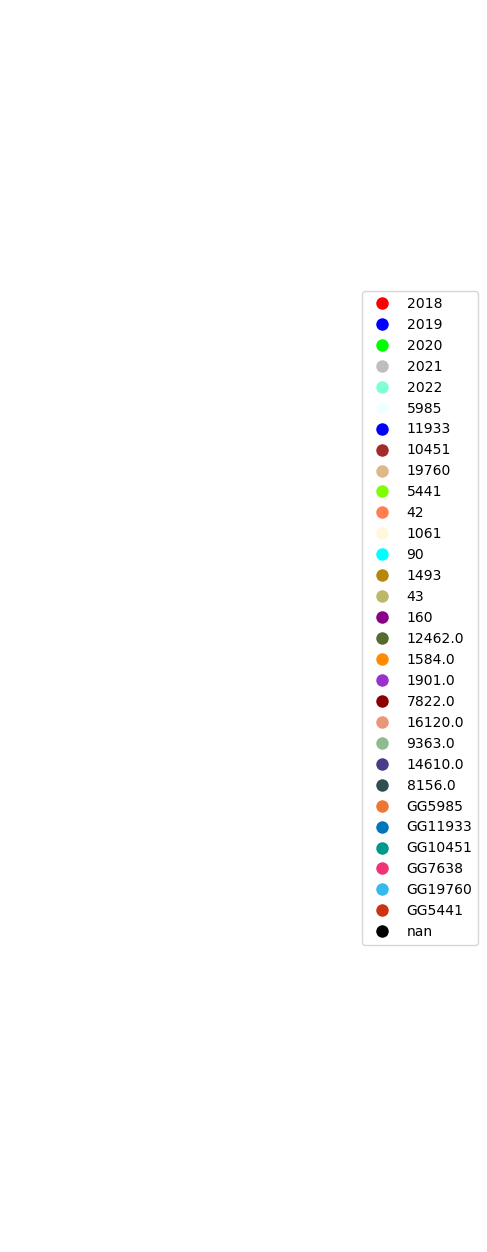

In [78]:
# Define the TreeStyle
circ_ts1 = ete3.TreeStyle()
circ_ts1.optimal_scale_level = "full"
circ_ts1.root_opening_factor = 1
circ_ts1.show_leaf_name = False
circ_ts1.mode = 'c'
circ_ts1.allow_face_overlap = True
circ_ts1.layout_fn = rects_layout

# Create a list of rectangles for the legend
legend_labels = list(cmap.keys())
legend_colors = list(cmap.values())
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                   for label, color in zip(legend_labels, legend_colors)]

# Create a legend figure and save it as an image
legend_fig = plt.figure(figsize=(4, 16))  # Adjust size for vertical legend
legend_fig.legend(handles=legend_patches, loc='center', bbox_to_anchor=(1.15, 0.5), ncol=1)  # Position on the right
legend_fig.gca().axis('off')  # Hide axes
legend_fig.savefig('11262023_legend_vertical.png', bbox_inches='tight', pad_inches=0.1)  # Save vertically

# Render the ETE Toolkit visualization
tree_image_path = '11262023_NG_circular_phylo_tree_vertical.png'
t.render(tree_image_path, tree_style=circ_ts1, dpi=600)

# Open both images and combine them vertically using PIL
tree_image = Image.open(tree_image_path)
legend_image = Image.open('11262023_legend_vertical.png')

# Create a new image with the combined tree and legend
combined_image = Image.new('RGBA', (tree_image.width + legend_image.width, max(tree_image.height, legend_image.height)))
combined_image.paste(tree_image, (0, 0))
combined_image.paste(legend_image, (tree_image.width, 0))

# Save the final combined image
combined_image.save('11262023_NG_combined_tree_with_vertical_legend.png')

